# Summary

The dataset has been taken from Kaggle for peer project purpose, which is about the "Impact of the Covid-19 Pandemic on the Global Economy: An Emphasis on Poverty Alleviation and Economic Growth" comes from Mendeley Data. The data I'm looking at comprises of statistics from 210 nations on the effects of covid-19 on the global economy.

The purpose of this analysis is to primarily focus on prediction. In this project, after implementing linear regression algorithms to find the interrelation between between target and certain variables like common GDP and human development index and total number of death. After going through the results of all the model, we will choose the optimal algorithm considering the preliminary results. The goal is to deploy a model which accurately predicts how GDP of each country is impacted by various factors.


# Exploratory Data Analysis 
 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline

#for muting the sklearn warning about regulariztion 
import warnings 
warnings.filterwarnings('ignore', module ='sklearn')

%matplotlib inline

In [2]:
df = pd.read_csv('raw_data.csv', sep = ',')
df.head()


,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [3]:
len(df['human_development_index'].unique())

158

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

Some information about this dataset

In [5]:
print('sum of all records: ' +str(len(df.index)))
print ('')
print('columns names: ' +str(df.columns.to_list()))
print('')
print('Number of countries: ' +str(len(df['location'].unique())))
print('')
print('Number of null_values in each column: \n' +str(df.isnull().sum()))

sum of all records: 50418

columns names: ['iso_code', 'location', 'date', 'total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

Number of countries: 210

Number of null_values in each column: 
iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64


# Feature Analysis

Some of description about data features are presented below:

<b>iso_code</b>: country code 

<b>location</b>: name of the country

<b>total_cases</b>: sum of covid19 cases 

<b>total_death</b>: sum of death caused by covid19

<b>stringency_index</b>: The Stringency index provides a computable parameter to evaluate the effectiveness of the nationwide lockdown. It is used by the Oxford Covid-19 Government Response Tracker with a database of 17 indicators of government response such as a school and workplace closing along with guidelines on public events and gatherings. The Stringency Index is a number from 0 to 100 that reflects these indicators, '0' being the lower and '100' being the higher level of stringency.

<b>population</b>: represents the sum of population of a country

<b>gdp_per_captia</b>: Per capita gross domestic product (GDP) is a financial metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a nation by its population. It's a measure of economic activity.

<b>human_development_index</b>: The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.


# Data Preparation

After finding out the amount of null values, I have decided to drop those missing row from data set and we would still have (31518)rows to train our linear models.

In [6]:
#dropping the irrelevant columns
df = df.drop(['iso_code', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis =1)


In [7]:
df = df.dropna(axis = 0)
print(df.isnull().sum())
print('')
print('number of rows: '+str(len(df)))


location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
dtype: int64

number of rows: 31518


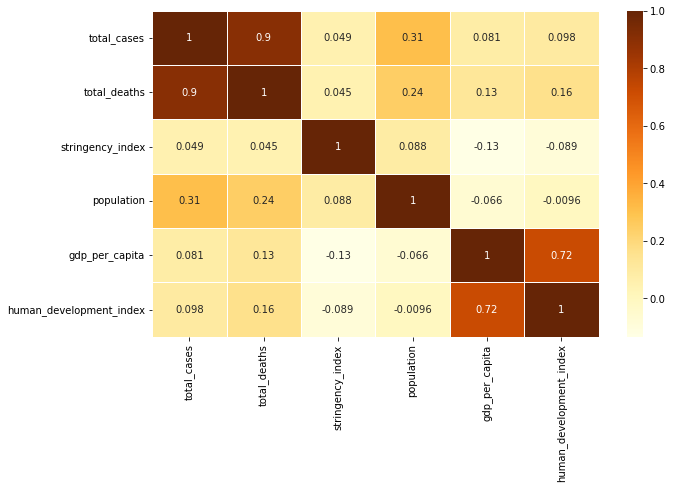

In [8]:
corr = df.corr(method = 'pearson')
figure = plt.subplots(figsize = (10,6))
sns.heatmap(corr,
           xticklabels= corr.columns,
           yticklabels= corr.columns,
           cmap="YlOrBr",
           annot=True,
           linewidth = 0.5);

After looking at the correlation coefficient, '1' being a strong positive correlation between two variables. Ignoring the diagonal line as it correlated to themselves only.

In this dataset we can observe that the human development index (HDI) is strongly correlated to the GDP per Capita and total number of cases and deaths, which is what we expected. Higher the number of population means more number of covid cases and therefore, deaths which ultimately have a big impact on HDI and GDP per Capita.

<b>GDP</b> and <b>HDI</b> are most affected by number of deaths compared to number of cases 

In [9]:
#Log-transforming the skewed variables
gdp_transformed = df['gdp_per_capita'].apply(lambda x: np.log(x+1))
total_deaths_transformed = df['total_deaths'].apply(lambda x: np.log(x+1))

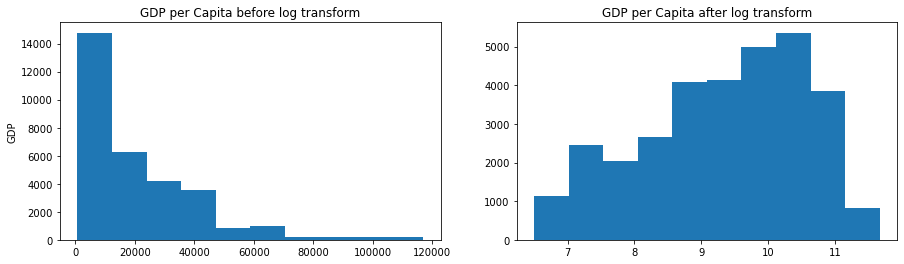

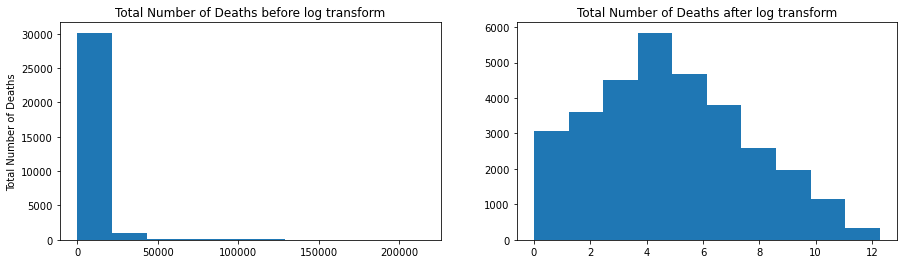

In [10]:
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(15,4))

ax_before.hist(df['gdp_per_capita'])
ax_after.hist(gdp_transformed)
ax_before.set_title('GDP per Capita before log transform')
ax_after.set_title('GDP per Capita after log transform')
ax_before.set_ylabel('GDP')


fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(15,4))
ax_before.hist(df['total_deaths'])
ax_after.hist(total_deaths_transformed)
ax_before.set_title('Total Number of Deaths before log transform')
ax_after.set_title('Total Number of Deaths after log transform')
ax_before.set_ylabel('Total Number of Deaths');

replacing original column with above transformation to our main data(df)


In [11]:
df['gdp_per_capita'] = gdp_transformed
df['total_deaths'] = total_deaths_transformed
df.head()

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,7.498309,0.498
1,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,7.498309,0.498
2,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,7.498309,0.498
3,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,7.498309,0.498
4,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,7.498309,0.498


Scaling data so that all feature can be interpreted on same scale when applying supervised learners

In [12]:
scaler = MinMaxScaler()
numerical = ['total_deaths', 'gdp_per_capita']
transform_df = pd.DataFrame(data=df)
transform_df[numerical] = scaler.fit_transform(df[numerical])
transform_df

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,2019-12-31,0.0,0.000000,0.00,38928341,0.193801,0.498
1,Afghanistan,2020-01-01,0.0,0.000000,0.00,38928341,0.193801,0.498
2,Afghanistan,2020-01-02,0.0,0.000000,0.00,38928341,0.193801,0.498
3,Afghanistan,2020-01-03,0.0,0.000000,0.00,38928341,0.193801,0.498
4,Afghanistan,2020-01-04,0.0,0.000000,0.00,38928341,0.193801,0.498
...,...,...,...,...,...,...,...,...
50413,Zimbabwe,2020-10-15,8055.0,0.443642,76.85,14862927,0.203796,0.535
50414,Zimbabwe,2020-10-16,8075.0,0.443642,76.85,14862927,0.203796,0.535
50415,Zimbabwe,2020-10-17,8099.0,0.443642,76.85,14862927,0.203796,0.535
50416,Zimbabwe,2020-10-18,8110.0,0.443642,76.85,14862927,0.203796,0.535


One-hot encoding the 'location' column was making the model more on variance side(overfitting), so I decided to drop that column. In addition to that, location column was not adding any value to our model.

In [13]:
from sklearn.model_selection import train_test_split

X_data = transform_df[['total_cases', 'total_deaths', 'stringency_index', 'population','human_development_index']]
y_data = transform_df['gdp_per_capita']

#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size = 0.3,
                                                    random_state =42)

#split samples 
print('training set samples: {}'.format(X_train.shape[0]))
print('testing set sample: {}'.format(X_test.shape[0]))


training set samples: 22062
testing set sample: 9456


# Linear Models for Training 

- Models training on our data are: Vanilla Linear, Ridge, Lasso, RidgeCV, LassoCV, Elastic Net
- analyze the accuracy score of different models
- analyze root-mean square errors
- plotting 'predictions' vs 'actual' results

In [14]:
kf = KFold (shuffle = True, random_state = 72018, n_splits = 3)

In [15]:
#starting with plain vanilla linear regression and k-fold cross validation

s = StandardScaler()
lr = LinearRegression()

X_train_s = s.fit_transform(X_train)
lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr.predict(X_test_s)
score = r2_score(y_test.values, y_pred)

#using pipeline 
estimator = Pipeline([("scaler",s), ('regression', lr)])
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv =kf)
linear_score= r2_score(y_train, predictions_lr)

print(linear_score, score)

0.7996927742013763 0.8002741740995301


Text(0, 0.5, '$R^2$')

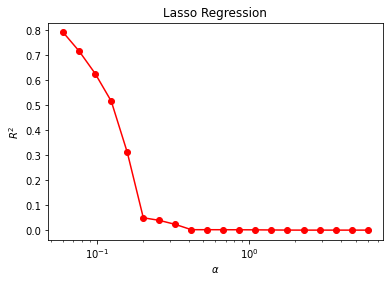

In [16]:
#Lasso regression and K-fold cross validation
s = StandardScaler()
pf = PolynomialFeatures(degree=3)
kf = KFold(shuffle = True, random_state = 72018, n_splits = 3)
scores=[]
alphas  = np.geomspace(0.06, 6.0 , 20)
predictions_lasso=[]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter = 100000)
    
    estimator= Pipeline([('scaler', s),
                         ('make_higher_degree', pf),
                          ('lasso_regression',lasso)])
    predictions_lasso = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_lasso)
    scores.append(score)
    
plt.semilogx(alphas, scores, '-o', color='red')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$') 

In [17]:
best_estimator = Pipeline([('scaler',s),
                           ('make_higher_degree', PolynomialFeatures(degree=2)),
                           ('lasso_regression', Lasso(alpha = 0.03))])
best_estimator.fit(X_train, y_train)

lasso_score = best_estimator.score(X_train, y_train)
lasso_score

0.8345430562106396

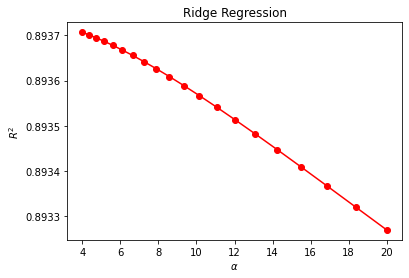

In [18]:
#ridge regression 


alphas = np.geomspace(4,20,20)
scores = []
predictions_ridge = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, max_iter = 100000)
    
    estimator = Pipeline([('scaler',s),
                          ('polynomial_features', PolynomialFeatures(degree=2)),
                          ('ridge_regression', ridge)])
    
    predictions_ridge = cross_val_predict(estimator, X_train, y_train,cv=kf)
    score = r2_score(y_train, predictions_ridge)
    scores.append(score)
    
plt.plot(alphas, scores, '-o', color = 'red')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [19]:
best_estimator = Pipeline([('scaler', s),
                           ('make_higher_degree', PolynomialFeatures(degree=2)),
                           ('ridge_regression', Ridge(alpha=0.03))])
best_estimator.fit(X_train, y_train)
ridge_score = best_estimator.score(X_train, y_train)

In [20]:
#comparing train models score
pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns = ['Linear_score','lasso_score', 'ridge_score'], index = ['$R^2$'])

,Linear_score,lasso_score,ridge_score
$R^2$,0.799693,0.834543,0.893962


It is clearly visible that ridge is best model out of three and ridge, lasso being better than linear regression 

In [21]:
def rmse (actual, prediction):
    return np.sqrt(mean_squared_error(actual, prediction))

#rmse of Vanilla regression
linear_regression = LinearRegression().fit(X_train,y_train)
linear_regression_rmse = rmse(y_test, linear_regression.predict(X_test))


#rmse of RidgeCV
alphas = [0.005, 0.05, 0.1, 0.3,1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas= alphas, cv = 4).fit(X_train, y_train)
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))


#rmse of lassoCV with cross-validation 

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])
lassoCV = LassoCV(alphas=alphas2,
                    max_iter = 5e4,
                    cv = 3).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))


#rmse of elastic net 

l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2,
                           l1_ratio=l1_ratios,
                           max_iter = 1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

models_rmse = [linear_regression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

rmse_val = list(zip(labels, models_rmse))
rmse_val


[('Linear', 0.10532374645422123),
 ('RidgeCV', 0.10532437149406416),
 ('LassoCV', 0.10532379259460657),
 ('ElasticNetCV', 0.10532415370522838)]

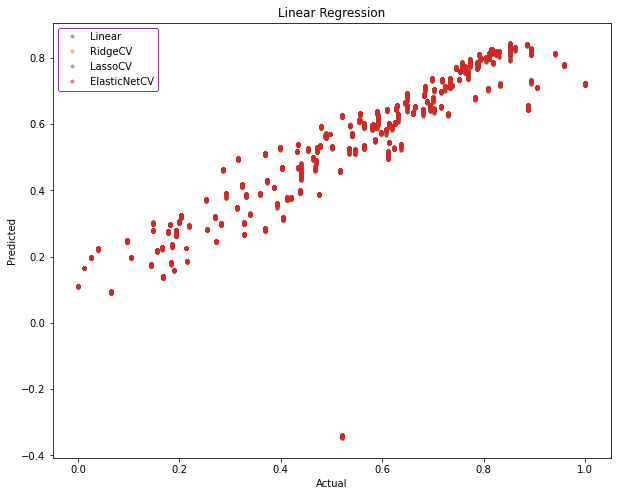

In [22]:
figure = plt.figure(figsize=(10,8))
models = [linear_regression, ridgeCV, lassoCV, elasticNetCV]

ax = plt.axes()

for lab, mod in zip(labels,models):
    ax.plot(y_test, mod.predict(X_test), marker = 'o', ls='',
           ms=3.0, label = lab, alpha = 0.5)

leg = plt.legend(frameon = True)
leg.get_frame().set_edgecolor('purple')
leg.get_frame().set_linewidth(1.0)

ax.set(title = 'Linear Regression', xlabel = 'Actual', ylabel = 'Predicted');

    

# Root-mean-square error

Graph is not giving the clear idea but after comparing 'root-mean-square' error of all model, we came to know that all there models have very similar value 

# Model accuracy
However, if we go by model accuracy, we can cleary see that Ridge Regression model cleary wins. Therefore, considering our project's primary purpose, i.e 'prediction', we recommend Ridge as a final model

# Next Steps 
Considering we have fairly few columns, we can find more features like "period without income" or "government subsidy per person" and one-hot code object column of "location" and add more feature interaction terms could help us achieve better results.